# Linear Classifiers


In [1]:
# downloading Fashion-MNIST
import os
datadir = os.getcwd()
os.chdir(os.path.join(datadir,"fashion-mnist/"))
!chmod +x ./get_data.sh
!./get_data.sh
os.chdir(datadir)

--2023-02-14 15:47:05--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4422102 (4.2M) [application/octet-stream]
Saving to: 't10k-images-idx3-ubyte.gz'

t10k-images-idx3-ub 100%[===================>]   4.22M  3.82MB/s    in 1.1s    

2023-02-14 15:47:07 (3.82 MB/s) - 't10k-images-idx3-ubyte.gz' saved [4422102/4422102]

--2023-02-14 15:47:07--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.10

# Imports

In [2]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from data_process import get_FASHION_data, get_RICE_data
from scipy.spatial import distance
from models import Perceptron, SVM, Softmax, Logistic
from kaggle_submission import output_submission_csv
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Loading Fashion-MNIST

In the following cells we determine the number of images for each split and load the images.
<br /> 
TRAIN_IMAGES + VAL_IMAGES = (0, 60000]
, TEST_IMAGES = 10000

In [3]:
# You can change these numbers for experimentation
# For submission we will use the default values 
TRAIN_IMAGES = 50000
VAL_IMAGES = 10000
normalize = True

In [4]:
data = get_FASHION_data(TRAIN_IMAGES, VAL_IMAGES, normalize=normalize)
X_train_fashion, y_train_fashion = data['X_train'], data['y_train']
X_val_fashion, y_val_fashion = data['X_val'], data['y_val']
X_test_fashion, y_test_fashion = data['X_test'], data['y_test']
n_class_fashion = len(np.unique(y_test_fashion))
print("labels of MNIST: ", np.unique(y_train_fashion))
print(X_train_fashion.shape, X_train_fashion.max(), X_train_fashion.min())

labels of MNIST:  [0 1 2 3 4 5 6 7 8 9]
(50000, 784) 254.91248 -161.62732


# Loading Rice

In [5]:
# loads train / test / val splits of 80%, 20%, 20% 
data = get_RICE_data()
X_train_RICE, y_train_RICE = data['X_train'], data['y_train']
X_val_RICE, y_val_RICE = data['X_val'], data['y_val']
X_test_RICE, y_test_RICE = data['X_test'], data['y_test']
n_class_RICE = len(np.unique(y_test_RICE))

print("Number of train samples: ", X_train_RICE.shape[0])
print("Number of val samples: ", X_val_RICE.shape[0])
print("Number of test samples: ", X_test_RICE.shape[0])
print("labels of RICE: ", np.unique(y_train_RICE)) # binary
print(X_train_RICE.shape, np.max(X_train_RICE), np.min(X_train_RICE))

Number of train samples:  10911
Number of val samples:  3637
Number of test samples:  3637
labels of RICE:  [0 1]
(10911, 11) 18185.0 0.2612973889


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [6]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Perceptron

Perceptron has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according to the perceptron update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Perceptron classifier in the **models/perceptron.py**

The following code: 
- Creates an instance of the Perceptron classifier class 
- The train function of the Perceptron class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy


## Train Perceptron on Fashion-MNIST

In [7]:
# self.lr = self.lr * (1 / (1 + self.decay_rate * self.epochs))
lr = 1e-2
n_epochs = 20
decay_rate = 2

st = time.time()
percept_fashion = Perceptron(n_class_fashion, lr, n_epochs, decay_rate)
percept_fashion.train(X_train_fashion, y_train_fashion, plot=False)
et = time.time()
print("perceptron training time: ", et - st)

perceptron training time:  19.543357133865356


In [8]:
pred_percept = percept_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_fashion)))

The training accuracy is given by: 84.526000


### Validate Perceptron on Fashion-MNIST

In [9]:
pred_percept = percept_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_fashion)))

The validation accuracy is given by: 83.190000


### Test Perceptron on Fashion-MNIST

In [10]:
# benchmark = 0.81420
pred_percept = percept_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_fashion)))

The testing accuracy is given by: 82.130000


### Perceptron_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy, output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [11]:
output_submission_csv('kaggle/perceptron_submission_fashion.csv', percept_fashion.predict(X_test_fashion))

## Train Perceptron on Rice

In [12]:
lr = 1e-2
n_epochs = 10
decay_rate = 2

percept_RICE = Perceptron(n_class_RICE, lr, n_epochs, decay_rate)
percept_RICE.train(X_train_RICE, y_train_RICE, plot=False)

In [13]:
pred_percept = percept_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_RICE)))

The training accuracy is given by: 99.835029


### Validate Perceptron on Rice

In [14]:
pred_percept = percept_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_RICE)))

The validation accuracy is given by: 99.807534


### Test Perceptron on Rice

In [15]:
pred_percept = percept_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_RICE)))

The testing accuracy is given by: 99.835029


# Support Vector Machines (with SGD)

Next, you will implement a "soft margin" SVM. In this formulation you will maximize the margin between positive and negative training examples and penalize margin violations using a hinge loss.

We will optimize the SVM loss using SGD. This means you must compute the loss function with respect to model weights. You will use this gradient to update the model weights.

SVM optimized with SGD has 3 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Epochs** - similar to as defined above in Perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case it is a coefficient on the term which maximizes the margin. You could try different values. The default value is set to 0.05.

You will implement the SVM using SGD in the **models/svm.py**

The following code: 
- Creates an instance of the SVM classifier class 
- The train function of the SVM class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train SVM on Fashion-MNIST

svm training time:  76.40774178504944


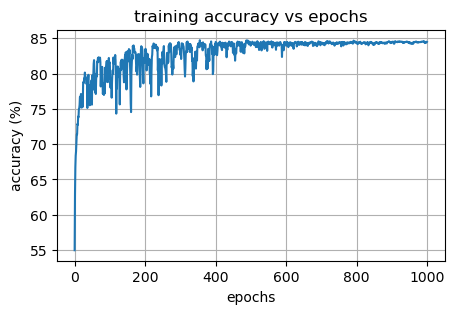

In [16]:
lr = 1e-3
n_epochs = 1000
batch_size = 1024
reg_const = 0.01
decay_rate = batch_size**0.5 - 0.12
st = time.time()
svm_fashion = SVM(n_class_fashion, lr, n_epochs, reg_const, batch_size, decay_rate)
svm_fashion.train(X_train_fashion, y_train_fashion)
et = time.time()
print("svm training time: ", et-st)

In [17]:
pred_svm = svm_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_fashion)))

The training accuracy is given by: 84.496000


### Validate SVM on Fashion-MNIST

In [18]:
pred_svm = svm_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_fashion)))

The validation accuracy is given by: 82.660000


### Test SVM on Fashion-MNIST

In [19]:
# benchmark = 0.81220
pred_svm = svm_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_fashion)))

The testing accuracy is given by: 81.940000


### SVM_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [20]:
output_submission_csv('kaggle/svm_submission_fashion.csv', svm_fashion.predict(X_test_fashion))

## Train SVM on Rice

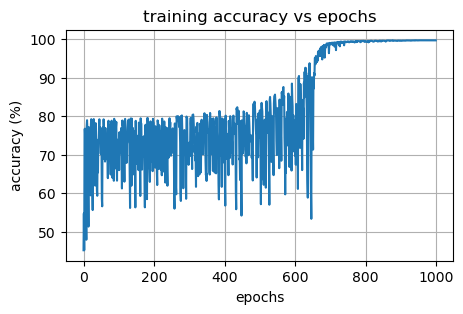

In [21]:
lr = 1e-3
n_epochs = 1000
batch_size = 256
reg_const = 0.01
decay_rate = batch_size**0.5 - 0.1

svm_RICE = SVM(n_class_RICE, lr, n_epochs, reg_const, batch_size, decay_rate)
svm_RICE.train(X_train_RICE, y_train_RICE)

In [22]:
pred_svm = svm_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_RICE)))

The training accuracy is given by: 99.715883


### Validate SVM on Rice

In [23]:
pred_svm = svm_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_RICE)))

The validation accuracy is given by: 99.725048


## Test SVM on Rice

In [24]:
pred_svm = svm_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_RICE)))

The testing accuracy is given by: 99.560077


# Softmax Classifier (with SGD)

Next, you will train a Softmax classifier. This classifier consists of a linear function of the input data followed by a softmax function which outputs a vector of dimension C (number of classes) for each data point. Each entry of the softmax output vector corresponds to a confidence in one of the C classes, and like a probability distribution, the entries of the output vector sum to 1. We use a cross-entropy loss on this softmax output to train the model. 

Check the following link as an additional resource on softmax classification: http://cs231n.github.io/linear-classify/#softmax

Once again we will train the classifier with SGD. This means you need to compute the gradients of the softmax cross-entropy loss function according to the weights and update the weights using this gradient. Check the following link to help with implementing the gradient updates: https://deepnotes.io/softmax-crossentropy

The softmax classifier has 3 hyperparameters that you can experiment with:
- **Learning rate** - As above, this controls how much the model weights are updated with respect to their gradient.
- **Number of Epochs** - As described for perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case, we minimize the L2 norm of the model weights as regularization, so the regularization constant is a coefficient on the L2 norm in the combined cross-entropy and regularization objective.

You will implement a softmax classifier using SGD in the **models/softmax.py**

The following code: 
- Creates an instance of the Softmax classifier class 
- The train function of the Softmax class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train Softmax on Fashion-MNIST

softmax training time:  61.75639486312866


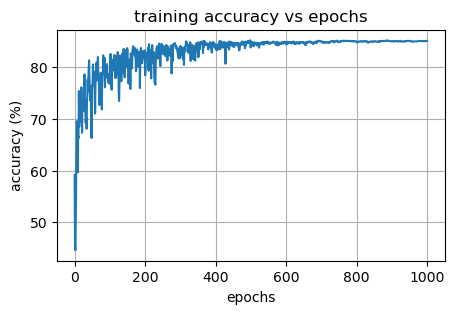

In [25]:
lr = 1e-2
n_epochs = 1000
reg_const = None
batch_size = 256
decay_rate = batch_size**0.5 - 0.09
st = time.time()
softmax_fashion = Softmax(n_class_fashion, lr, n_epochs, reg_const, batch_size, decay_rate)
softmax_fashion.train(X_train_fashion, y_train_fashion)
et = time.time()
print("softmax training time: ", et-st)

In [26]:
pred_softmax = softmax_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_fashion)))

The training accuracy is given by: 85.020000


### Validate Softmax on Fashion-MNIST

In [27]:
pred_softmax = softmax_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_fashion)))

The validation accuracy is given by: 83.270000


### Testing Softmax on Fashion-MNIST

In [28]:
# benchmark = 0.82980
pred_softmax = softmax_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_fashion)))

The testing accuracy is given by: 82.260000


### Softmax_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [29]:
output_submission_csv('kaggle/softmax_submission_fashion.csv', softmax_fashion.predict(X_test_fashion))

## Train Softmax on Rice

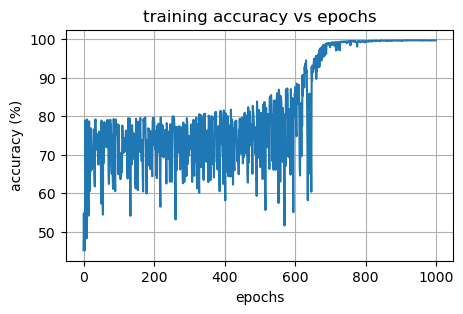

In [30]:
lr = 1e-2
n_epochs = 1000
reg_const = None
batch_size = 256
decay_rate = batch_size**0.5 - 0.1

softmax_RICE = Softmax(n_class_RICE, lr, n_epochs, reg_const, batch_size, decay_rate)
softmax_RICE.train(X_train_RICE, y_train_RICE)

In [31]:
pred_softmax = softmax_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_RICE)))

The training accuracy is given by: 99.697553


### Validate Softmax on Rice

In [32]:
pred_softmax = softmax_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_RICE)))

The validation accuracy is given by: 99.697553


### Testing Softmax on Rice

In [33]:
pred_softmax = softmax_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_RICE)))

The testing accuracy is given by: 99.560077


# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Number of Epochs** - As described for perceptron.
- **Threshold** - The decision boundary of the classifier.


You will implement the Logistic Classifier in the **models/logistic.py**

The following code: 
- Creates an instance of the Logistic classifier class 
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Training Logistic Classifer

In [34]:
# self.lr = self.lr * (1 / (1 + self.decay_rate * self.epochs))
learning_rate = 0.5
n_epochs = 10
threshold = 0.5
decay_rate = 2

lr = Logistic(learning_rate, n_epochs, threshold, decay_rate)
lr.train(X_train_RICE, y_train_RICE)

In [35]:
pred_lr = lr.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train_RICE)))

The training accuracy is given by: 99.844194


### Validate Logistic Classifer

In [36]:
pred_lr = lr.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_RICE)))

The validation accuracy is given by: 99.835029


### Test Logistic Classifier

In [37]:
pred_lr = lr.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test_RICE)))

The testing accuracy is given by: 99.835029
